# Boston Airbnb Dataset

[Kaggle Link](https://www.kaggle.com/airbnb/boston)

Outline

- Initial look at the data - listings.csv
    - Identify columns with missing values
    - Identify columns to drop that suggest potential colinearity or are not useful, i.e id columns, urls, one value
    - 
- Initial look at the data - calendar.csv
    - Missing values
    - Remove unnecessary columns
- Merge listings and calendar datasets

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import re

calendar = pd.read_csv('data/boston/calendar.csv')
listings = pd.read_csv('data/boston/listings.csv')

# Show maximum 500 columns when displaying dataframes
pd.set_option('display.max_columns', 500)

# Use Seaborn standard design palette for plots
sns.set()


datasets = [calendar, listings]
for dataset in datasets:
    display(dataset.sample(3))

,listing_id,date,available,price
97498,14428514,2017-05-28,t,$100.00
1249290,14756029,2017-06-10,f,NaN
974344,11441717,2016-10-27,f,NaN


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3495,5870922,https://www.airbnb.com/rooms/5870922,20160906204935,2016-09-07,Sunset Room near Harvard Square (BR 2),Private room with a private entrance in a new ...,"Clean, bright, spacious carpeted bedroom with ...",Private room with a private entrance in a new ...,none,"Very safe and quiet residential neighborhood, ...",The house is on an easy to use keypad entry sy...,Quick access to several local buses ((PHONE NU...,Guests will have access to a private bedroom w...,Interaction mostly by text and email.,No pets. No smoking. Guests need to be respect...,https://a1.muscache.com/im/pictures/73146202/0...,https://a1.muscache.com/im/pictures/73146202/0...,https://a1.muscache.com/im/pictures/73146202/0...,https://a1.muscache.com/im/pictures/73146202/0...,26956083,https://www.airbnb.com/users/show/26956083,Todd,2015-01-30,"Boston, Massachusetts, United States",I'm a professional designer and house renovato...,within an hour,99%,93%,f,https://a2.muscache.com/im/users/26956083/prof...,https://a2.muscache.com/im/users/26956083/prof...,Allston-Brighton,24,24,"['email', 'phone', 'reviews', 'kba']",t,t,"West Sorrento Street, Boston, MA 02134, United...",Allston-Brighton,Allston,NaN,Boston,MA,02134,Boston,"Boston, MA",US,United States,42.361265,-71.125320,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,$91.00,$500.00,"$1,750.00",NaN,$25.00,1,$20.00,2,90,a week ago,NaN,0,5,35,125,2016-09-06,46,2015-04-19,2016-08-30,96.0,10.0,10.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,strict,f,f,24,2.72
2563,7511838,https://www.airbnb.com/rooms/7511838,20160906204935,2016-09-07,The Mandarin near Harvard Square,"Completely renovated 2,500 sq ft home with 5 b...",Large open floor plan connecting kitchen and l...,"Completely renovated 2,500 sq ft home with 5 b...",none,Very safe and convenient neighborhood close to...,There are bicycle rental places all over the c...,Bus service is available at the end of the str...,Guest have access to their private room as wel...,Check-in is completely automated so you can ar...,Please be respectful of other guests. Keep th...,https://a1.muscache.com/im/pictures/105168503/...,https://a1.muscache.com/im/pictures/105168503/...,https://a1.muscache.com/im/pictures/105168503/...,https://a1.muscache.com/im/pictures/105168503/...,26956083,https://www.airbnb.com/users/show/26956083,Todd,2015-01-30,"Boston, Massachusetts, United States",I'm a professional designer and house renovato...,within an hour,99%,93%,f,https://a2.muscache.com/im/users/26956083/prof...,https://a2.muscache.com/im/users

## Plotting the listings on a map

In [2]:
BBox = (
    listings.longitude.min(), listings.longitude.max(),
    listings.latitude.min(), listings.latitude.max()
)

print(BBox)

boston_map = plt.imread('map.png')

neighbourhoods = listings.neighbourhood_cleansed.unique()
colours = ['#2F4F4F', '#708090', '#7CFC00', '#CD5C5C', '#F5DEB3', '#98FB98',
           '#A52A2A', '#FFEFD5', '#87CEFA', '#FDF5E6', '#FFFACD', '#BDB76B',
           '#FFF8DC', '#FF00FF', '#7FFF00', '#008B8B', '#B22222', '#F4A460',
           '#00FFFF', '#778899', '#FFFFF0', '#DCDCDC', '#F5F5F5', '#3CB371',
           '#D8BFD8']

colours_zip = dict(zip(neighbourhoods, colours))

(-71.17178882136898, -71.00009991969033, 42.235941807706816, 42.38998167884297)


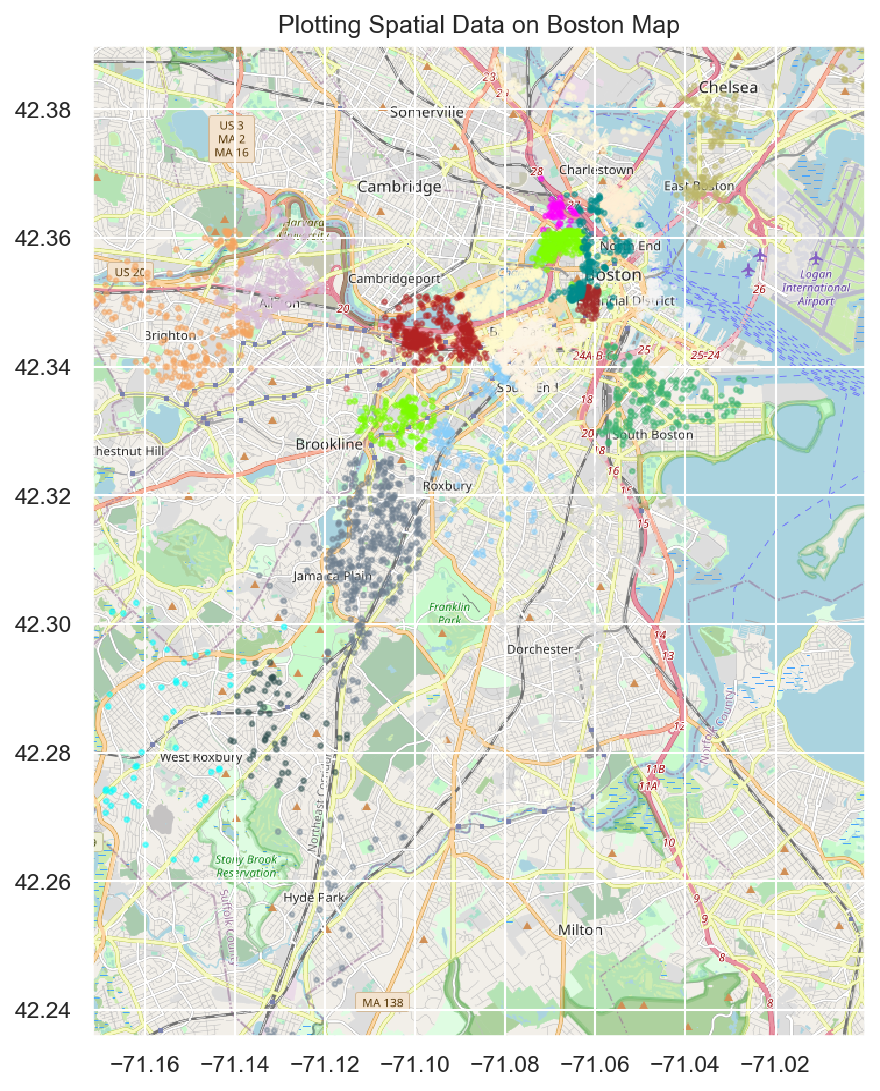

In [3]:
fig, ax = plt.subplots(figsize=(6.65, 8.75), dpi=150)
ax.scatter(listings.longitude, listings.latitude, zorder=1, alpha= 0.5,
           c=listings.neighbourhood_cleansed.apply(lambda x: colours_zip[x]), s=5)
ax.set_title('Plotting Spatial Data on Boston Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(boston_map, zorder=0, extent = BBox, aspect='auto');

## Initial look at the data - listings.csv

In [4]:
print(f'The dataset contains {len(listings.id.unique())} from {len(listings.host_id.unique())} hosts.')

The dataset contains 3585 from 2181 hosts.


From the missingno matrix we see that we have a few features with only null values and some with mostly null values. We'll drop these along with any columns containing only one unique value and columns containing IDs or URL links.

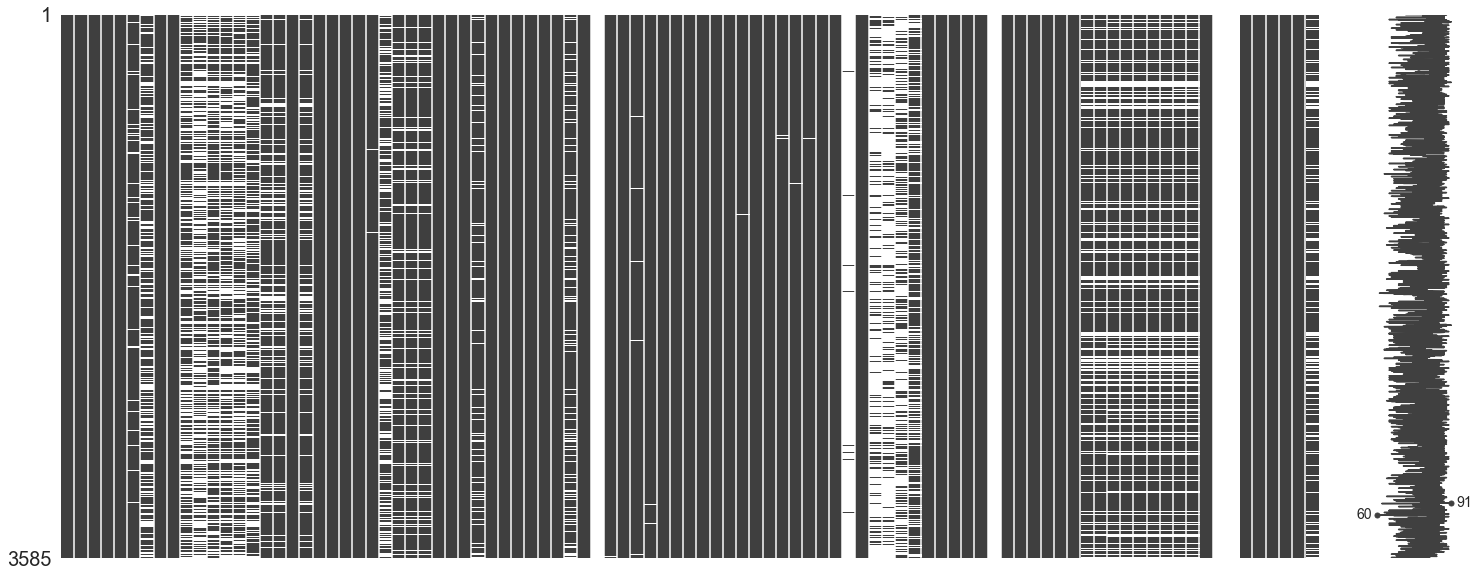

In [5]:
msno.matrix(listings);

In [6]:
# Note number of columns
before = len(listings.columns)

# Drop columns with all null values
all_null = len(listings.columns[listings.isnull().mean() == 1])
listings = listings.dropna(how='all', axis=1)

# Drop columns with more than 50% null values
more_than_50_null = listings.columns[listings.isnull().mean() > 0.5]
listings = listings.drop(more_than_50_null, axis=1)

# Drop columns with only one value
one_value_columns = [column for column in listings.columns if len(listings[column].unique()) == 1]
listings.drop(one_value_columns, axis=1, inplace=True)

# Drop url, ID (except for 'id') and name columns
url_id_columns = listings.columns[listings.columns.str.contains('url|_id|name')]
listings = listings.drop(url_id_columns, axis=1)

print(
    '{} columns dropped:\
    \n\t{} columns with only null values\
    \n\t{} columns with more than 50% null values\
    \n\t{} columns with only one unique value\
    \n\t{} URL/ID/name columns'.format(
        before - len(listings.columns),
        all_null,
        len(more_than_50_null),
        len(one_value_columns),
        len(url_id_columns)
    )
)

29 columns dropped:    
	4 columns with only null values    
	5 columns with more than 50% null values    
	8 columns with only one unique value    
	12 URL/ID/name columns


Now we will drop a bunch of features for many different reasons:
- they're covered by other features
- they are likely to add variance to the model by being colinear to our target variable
- they are almost completely one value

In [7]:
to_drop = [
    'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
    'host_verifications', 'host_has_profile_pic', 'street', 'neighbourhood',
    'city', 'zipcode', 'market', 'smart_location', 'latitude', 'longitude',
    'is_location_exact', 'cleaning_fee', 'guests_included', 'extra_people',
    'minimum_nights', 'maximum_nights', 'calendar_updated', 'availability_30',
    'bed_type', 'availability_60', 'availability_90', 'availability_365',
    'first_review', 'last_review', 'require_guest_profile_picture', 
    'require_guest_phone_verification'
]

listings = listings.drop(to_drop, axis=1)

We are now going to convert text features to numerical ones.

- Summary and description features will be converted to a character count to see if a longer description helps.
- We will create a boolean local feature based on whether the host is from Boston or not
- `host_since` will be converted to a timedelta between an individual host's sign up date and the most recent host sign up
- `host_response_time` will be converted to a dummy variable
- % and $ signs will be stripped
- `amenities` column will be converted to a count of amenities listed
- Convert t/f features to 1 or 0

In [8]:
# Define description features
description_features = ['summary', 'space', 'description', 'neighborhood_overview', 'transit', 'access', 'interaction', 'house_rules', 'host_about']

# Convert null values to empty strings
listings[description_features] = listings[description_features].apply(lambda col: col.fillna(''), axis=1)

# Convert description features to character counts
for column in listings[description_features]:
    listings[column] = listings[column].apply(lambda x: len(x))

# Convert host_since to datetime and create host_since_days timedelta feature
listings.host_since = pd.to_datetime(listings.host_since, yearfirst=True)
listings['host_since_days'] = (listings.host_since - listings.host_since.min()).dt.days

# Create is_local feature based on host_location
local_destination = 'Boston, Massachusetts, United States'
listings['is_local'] = listings.host_location.apply(
    lambda location: 1 if location==local_destination else 0
)

# Drop converted features
listings = listings.drop(['host_since', 'host_location'], axis=1)

# Map host_response_time values to numerical values
response_map = {
    np.nan: 0,
    'a few days or more': 1,
    'within a day': 2,
    'within a few hours': 3,
    'within an hour': 4
}
listings.host_response_time = listings.host_response_time.replace(response_map)

# Remove ['$', ',', '%'] and convert to float
str_to_float_columns = ['host_response_rate', 'host_acceptance_rate', 'price']
for column in str_to_float_columns:
#     listings[column] = listings[column].str.replace('$', '').str.replace('%', '').str.replace(',', '').astype(float)
    listings[column] = listings[column].apply(lambda value: re.sub(r'\$|,|%', '', str(value))).astype(float)
    
# Convert boolean t/f columns to 1/0 columns
boolean_columns = ['host_is_superhost', 'instant_bookable']
for column in boolean_columns:
    listings[column] = listings[column].apply(lambda val: 1 if val=='t' else 0)
    
# Convert amenities to amenities_count
listings['amenities_count'] = listings.amenities.str.count(',')+1
listings = listings.drop('amenities', axis=1)

In [9]:
listings.sample(5)

,id,summary,space,description,neighborhood_overview,transit,access,interaction,house_rules,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month,host_since_days,is_local,amenities_count
2451,11454728,130,0,130,0,0,0,0,0,790,3,97.0,81.0,0,Fenway,Apartment,Entire home/apt,4,2.0,2.0,2.0,249.0,11,76.0,8.0,9.0,7.0,7.0,10.0,8.0,0,moderate,17,2.37,2073,1,18
3184,7745117,488,523,1000,459,473,161,111,0,0,3,100.0,92.0,0,South Boston,Condominium,Entire home/apt,4,2.0,2.0,2.0,250.0,11,98.0,10.0,10.0,10.0,10.0,9.0,10.0,0,moderate,1,3.75,2459,1,19
3021,8291550,245,0,245,0,0,0,0,0,265,2,90.0,33.0,0,Dorchester,Condominium,Entire home/apt,4,1.0,3.0,3.0,150.0,1,100.0,10.0,8.0,10.0,10.0,8.0,10.0,0,moderate,1,1.00,2492,1,24
1147,9757412,292,643,1000,243,566,372,149,230,678,4,100.0,100.0,1,South End,Apartment,Private room,1,1.0,1.0,1.0,89.0,15,96.0,10.0,10.0,10.0,10.0,9.0,10.0,0,strict,1,1.70,2576,1,22
401,14444280,38,0,38,0,0,0,0,0,0,4,100.0,67.0,0,Mission Hill,Apartment,Entire home/apt,2,1.0,0.0,1.0,115.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,1,NaN,2678,0,19


We are left with only a few objects with the rest being numerical features.

## Initial look at the data - calendar.csv

First off, with `price` as our target variable, we will drop any rows where the price is null. A quick glance at the data shows that this value is null when the listing is not availble for a given date.

Therefore we drop rows where price is null and drop the `available` column as this then contains only one value.

In [10]:
calendar.sample(2)

,listing_id,date,available,price
760875,8696200,2016-12-09,f,NaN
253366,24240,2017-02-10,t,$250.00


In [11]:
# Drop any rows without the predictor value
calendar.dropna(subset=['price'], inplace=True)

# Convert price into a float
calendar.price = calendar.price.apply(
    lambda value: re.sub(r'\$|,', '', value)
).astype(float)

# Extract month from date string
calendar['month'] = calendar.date.apply(lambda value: value.split('-')[1]).astype(int)

# Drop available and date columns
calendar = calendar.drop(['available', 'date'], axis=1)

calendar.sample(2)

,listing_id,price,month
1015037,570493,125.0,10
829663,13266833,100.0,6


## Merge datasets

In [12]:
df = pd.merge(
    listings, calendar, how='left',
    left_on='id', right_on='listing_id',
)

We will drop the price in the original listings dataset and keep the one from the calendar dataset which is time sensitive.

We'll also drop the 0.1% of rows without a price value and the remaining id rows that we used for the merge.

In [13]:
df = df.drop(['price_x', 'listing_id' ], axis=1)
df = df.rename({'price_y': 'price'}, axis=1)
df = df.dropna(subset=['price'])

df.sample(5)

,id,summary,space,description,neighborhood_overview,transit,access,interaction,house_rules,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month,host_since_days,is_local,amenities_count,price,month
598060,14928333,269,72,613,106,37,60,64,0,0,0,NaN,NaN,0,South Boston,Apartment,Private room,2,1.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict,1,NaN,2411,1,17,90.0,11.0
609383,14055887,174,0,174,0,0,0,0,473,94,3,100.0,63.0,0,Allston,House,Private room,1,1.5,1.0,1.0,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict,5,1.00,2581,1,15,45.0,8.0
365201,9905304,139,1000,1000,0,0,0,0,0,0,4,98.0,72.0,0,Downtown,Apartment,Entire home/apt,6,1.0,2.0,2.0,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,flexible,2,0.14,2164,1,16,375.0,2.0
594093,9507164,247,621,1000,572,421,222,217,20,249,3,98.0,66.0,0,South Boston,Other,Private room,2,6.0,1.0,1.0,1,60.0,4.0,4.0,6.0,6.0,8.0,6.0,0,strict,19,0.37,974,1,11,224.0,1.0
122985,3129309,250,1000,1000,253,402,77,82,1000,477,4,100.0,100.0,0,North End,Apartment,Entire home/apt,2,1.0,1.0,1.0,171,92.0,9.0,9.0,10.0,10.0,10.0,9.0,1,strict,6,6.23,1410,1,15,125.0,1.0


## EDA


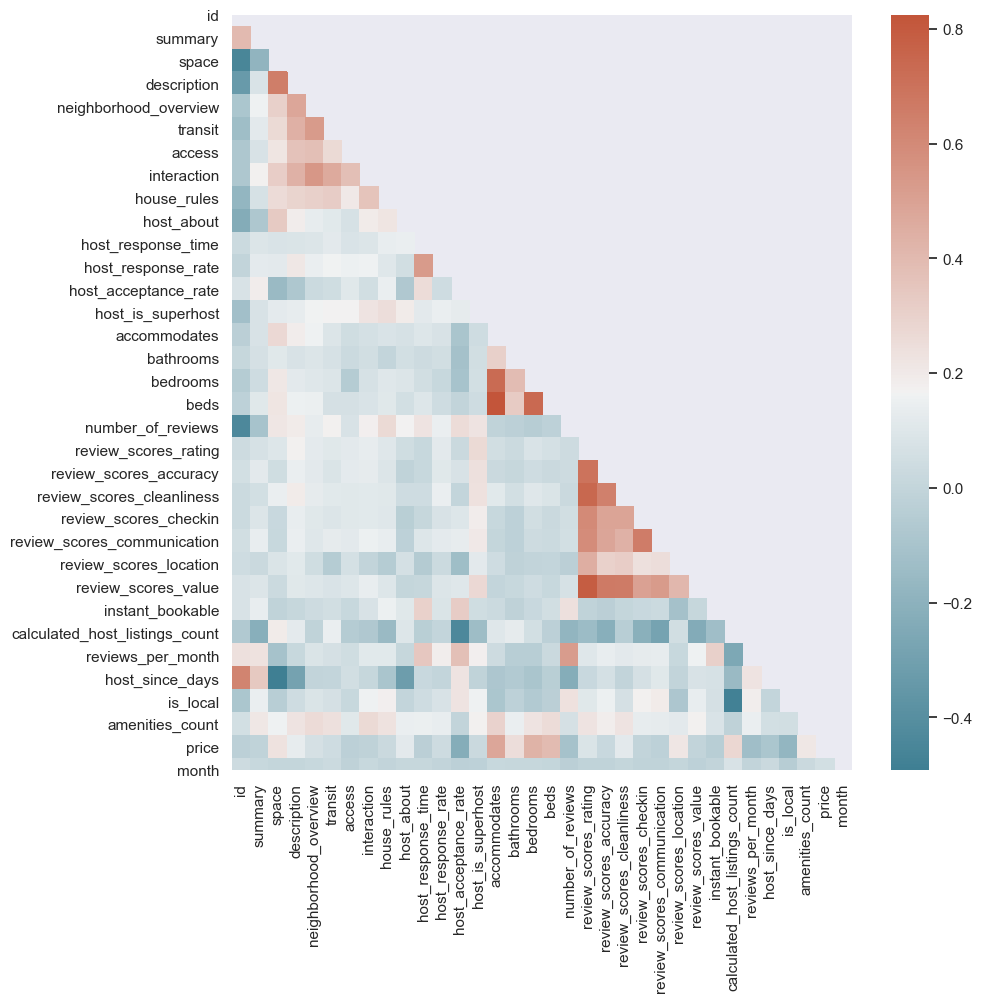

In [14]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap);

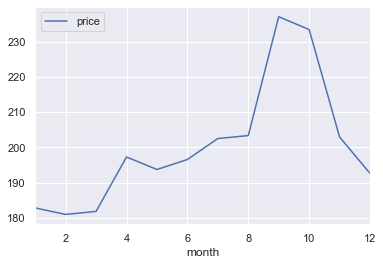

In [15]:
month_agg = df.groupby('month').agg(
    {'price': np.mean}
)

month_agg.plot();

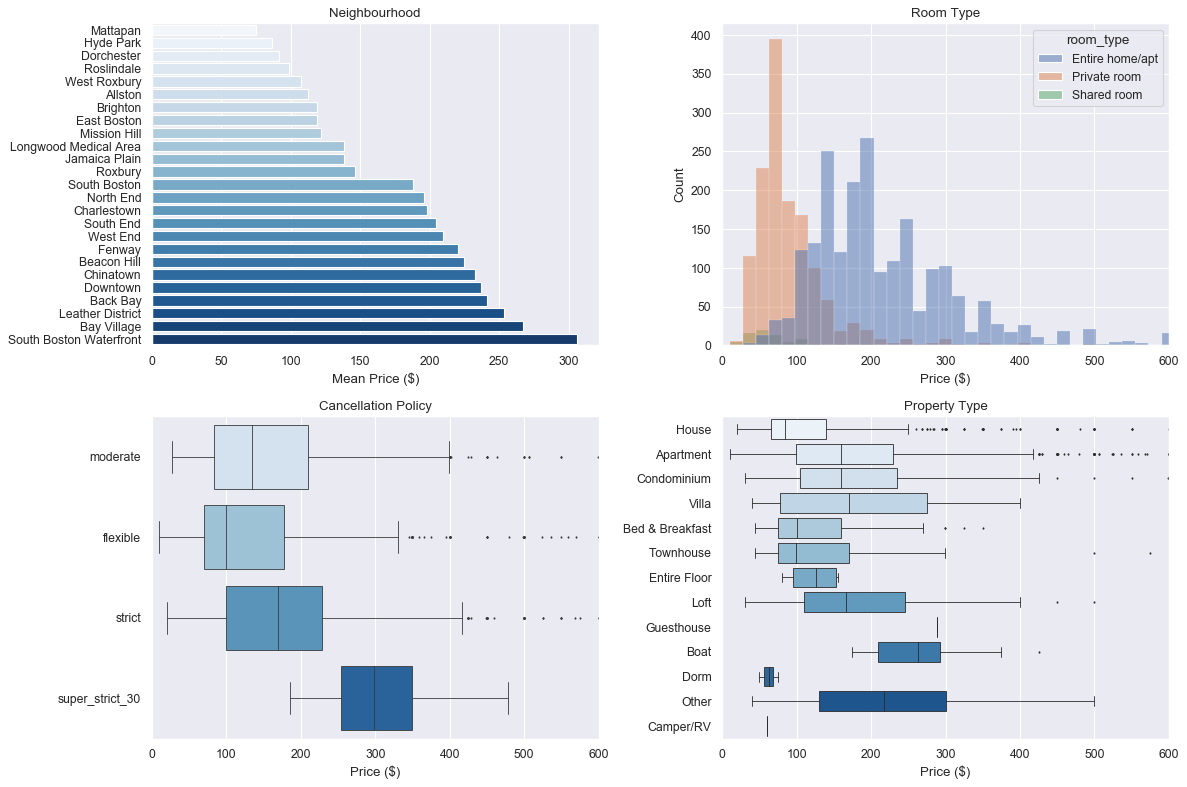

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10), dpi=80)

# Neighbourhoods
neighbourhoods = listings.groupby('neighbourhood_cleansed').agg(
    {
        'price': np.mean
    }
).reset_index()
sns.barplot(
    x='price', y='neighbourhood_cleansed',
    data=neighbourhoods.sort_values('price'),
    orient='h',
    palette='Blues',
    ax=axs[0, 0]
)
axs[0, 0].set_title('Neighbourhood')
axs[0, 0].set_xlabel('Mean Price ($)')
axs[0, 0].set_ylabel('')

# Room type
sns.histplot(x='price', hue='room_type',
             data=listings, ax=axs[0, 1])
axs[0, 1].set_xlim(0, 600)
axs[0, 1].set_title('Room Type')
axs[0, 1].set_xlabel('Price ($)')

# Cancellation Policy
sns.boxplot(x='price', y='cancellation_policy', fliersize=1, linewidth=0.75,
            data=listings, palette='Blues', ax=axs[1, 0])
axs[1, 0].set_xlim(0, 600)
axs[1, 0].set_title('Cancellation Policy')
axs[1, 0].set_xlabel('Price ($)')
axs[1, 0].set_ylabel('')

# Property type
sns.boxplot(x='price', y='property_type', fliersize=1, linewidth=0.75,
            data=listings, palette='Blues', ax=axs[1, 1])
axs[1, 1].set_xlim(0, 600)
axs[1, 1].set_title('Property Type')
axs[1, 1].set_xlabel('Price ($)')
axs[1, 1].set_ylabel('')

plt.tight_layout()
plt.show();

## Model Fitting 

### Preprocessing 

As a final bit of preprocessing, we'll impute missing values, encode categorical features and drop the `id` column.

The missing values we have are almost all related to reviews with features such as `host_response_rate` not being available if the host has not had any reviews. We'll impute these missing values with a 0.

In [21]:
# Columns to impute with a 0
impute_with_0 = [
    'host_response_rate', 'host_acceptance_rate', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value', 'reviews_per_month'
]

for column in impute_with_0:
    df[column] = df[column].fillna(0)

For the final few columns that contain null values, we will drop the 0.5% of rows that contain nulls.

In [22]:
_ = df.shape[0]
df = df.dropna()
print(f'{_ - df.shape[0]} rows dropped of {_}')

8523 rows dropped of 643037


Finally we create dummies and drop the id column.

In [24]:
df = pd.get_dummies(df)
df = df.drop(['id'], axis=1)

In [25]:
df.to_csv('data/boston/cleaned_df.csv')

We'll also remove some of the more extreme outliers from our dataset as this will impact our regression analysis.